# 1B. Mean Climate Driver

This notebook introduces new users to the PCDMI mean climate driver.

This notebook should be run in an environment with python, jupyterlab, pcmdi metrics package, and cdat installed. It is expected that you have downloaded the sample data as demonstrated in the [0. Prepare Demos](Demo_0_download_data.ipynb) notebook.

To see which datasets are the default and which are alternates, check out [pcmdi_metrics/doc/obs_info_dictionary.json](https://github.com/PCMDI/pcmdi_metrics/blob/main/doc/obs_info_dictionary.json).

The following cell reads in the choices you made during the download data step:

In [1]:
from user_choices import demo_data_directory, demo_output_directory

In [2]:
# To open and display one of the graphics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

import os

%matplotlib inline

## Download reference datasets

In [3]:
# Lets get the file containing the data needed for this demo
import requests
r = requests.get("https://pcmdi.llnl.gov/pss/pmpdata/PMP_obs4MIPsClims_v20250228.txt")
with open("data_files.txt","wb") as f:
    f.write(r.content)

In [4]:
# This is where you will be downloading the sample_data
demo_data_directory = "demo_data_tmp"
# this line is where your output will be stored
demo_output_directory = "demo_output_tmp"

In [5]:
# Let's download the files
from pcmdi_metrics.io.base import download_sample_data_files
try:
    download_sample_data_files("data_files.txt", demo_data_directory)
    print("All files downloaded")
except Exception:
    print("Download failed")

All files downloaded


## Basic use

The PCMDI Median Driver is driven via parameter files reflecting your study and environment. The parameter file for this demo is shown here:

In [6]:
with open("basic_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# RUN IDENTIFICATION
# DEFINES A SUBDIRECTORY TO METRICS OUTPUT RESULTS SO MULTIPLE CASES CAN
# BE COMPARED
case_id = 'basicTest'

# LIST OF MODEL VERSIONS TO BE TESTED - WHICH ARE EXPECTED TO BE PART OF
# CLIMATOLOGY FILENAME
test_data_set = ['ACCESS1-0', 'CanCM4']


# VARIABLES TO USE
vars = ['pr']


# Observations to use at the moment "default" or "alternate"
reference_data_set = ['all']
#ext = '.nc'

# INTERPOLATION OPTIONS
target_grid = '2.5x2.5'  # OPTIONS: '2.5x2.5' or an actual cdms2 grid object
regrid_tool = 'regrid2'  # 'regrid2' # OPTIONS: 'regrid2','esmf'
# OPTIONS: 'linear','conservative', only if tool is esmf
regrid_method = 'linear'
regrid_tool_ocn = 'esmf'    # OPTIONS: "regrid2","esmf"
# OPTIONS: 'linear','conservative', only if tool is esmf
regrid_method_ocn = 'linear'

# Templates for climatology files
# %(param) will subsitute param with values in this file
filename_template = "cmip5.hi

To run the mean climate driver, use the following command in the terminal. This will generate a metrics file based on the models, observations, and other criteria in `basic_param.py`
```
mean_climate_driver.py -p basic_param.py
```  
In the next cell, bash cell magic is used to run this command as a subprocess:

In [7]:
%%bash
mean_climate_driver.py  -p basic_param.py

--- prepare mean climate metrics calculation ---
case_id: basicTest
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['pr']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {

2025-07-15 15:53:21,349 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-15 15:53:21,349 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 15:53:21,558 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:53:21,558 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.7995509408249972
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.515774881304398
metrics, std_xyt
metrics, std_xyt: 3.1305194374804888
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 0.25922717938795004
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.72142914491151
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.1919949785767163 1.1634660710217004
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.883562458809904
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE 

INFO::2025-07-15 15:53::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_basicTest.json
2025-07-15 15:53:41,426 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_basicTest.json
2025-07-15 15:53:41,426 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_basicTest.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 15:53:41,433 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:53:41,433 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.6937110851537234
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.515774881304398
metrics, std_xyt
metrics, std_xyt: 2.7462907772599525
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -0.053533741934399505
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.7740939928776985
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.21206440023263 1.2108815998212985
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8345736267748058
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULA

INFO::2025-07-15 15:54::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_basicTest.json
2025-07-15 15:54:01,209 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_basicTest.json
2025-07-15 15:54:01,209 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_basicTest.json
INFO::2025-07-15 15:54::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/pr_2.5x2.5_re

pmp mean clim driver completed


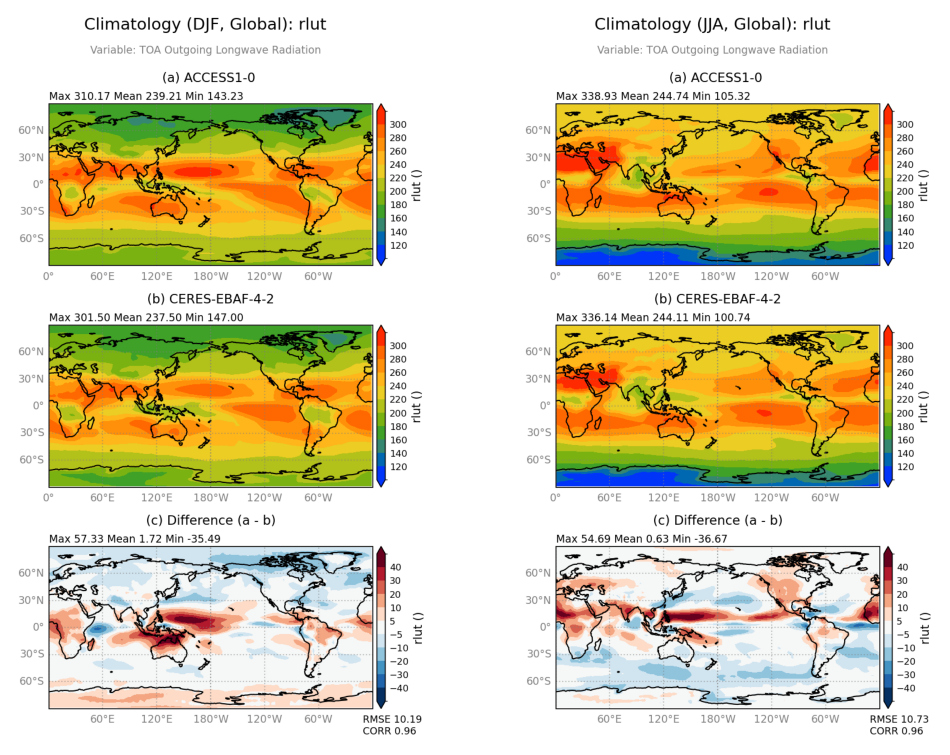

In [8]:
# figure size in inches optional
rcParams['figure.figsize'] = 12, 10

# path to images
image_path_djf = os.path.join(demo_output_directory,"basicTest/rlut/rlut_ACCESS1-0__interpolated_regrid2_Global_DJF_basicTest.png")
image_path_jja = os.path.join(demo_output_directory,"basicTest/rlut/rlut_ACCESS1-0__interpolated_regrid2_Global_JJA_basicTest.png")

# display images
fig, ax = plt.subplots(1,2); ax[0].axis('off'); ax[1].axis('off')
ax[0].imshow(mpimg.imread(image_path_djf))
ax[1].imshow(mpimg.imread(image_path_jja))

Running the mean climate driver produces an output json file in the demo output directory. The metrics are stored in the "RESULTS" object of the json, viewed here:

In [9]:
import json
import os
output_path = os.path.join(demo_output_directory,"basicTest/rlut_2.5x2.5_regrid2_metrics_basicTest.json")
with open(output_path) as f:
    metric = json.load(f)["RESULTS"]
print(json.dumps(metric, indent=2))

{
  "ACCESS1-0": {
    "alternate1": {
      "source": "CERES-EBAF-4-0",
      "": {
        "InputClimatologyFileName": "cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc",
        "Global": {
          "bias_xy": {
            "ann": "1.13844e+00",
            "djf": "1.67490e+00",
            "mam": "1.39179e+00",
            "jja": "8.59122e-01",
            "son": "6.29436e-01",
            "CalendarMonths": [
              "1.70942e+00",
              "1.20757e+00",
              "1.20022e+00",
              "1.35926e+00",
              "1.60580e+00",
              "1.28681e+00",
              "8.19685e-01",
              "4.69598e-01",
              "1.84053e-01",
              "3.97732e-01",
              "1.29905e+00",
              "2.12214e+00"
            ]
          },
          "cor_xy": {
            "ann": "9.69383e-01",
            "djf": "9.62127e-01",
            "mam": "9.50753e-01",
            "jja": "9.61062e-01",
            "son": "9.6270

## Customizing parameters in the mean climate driver

It is possible to override the parameter file from the command line. Use `mean_climate_driver.py --help` to see all the flag options.  
  
This next cell demonstrates how to change 'case_id' and 'regrid_tool' on the command line. Changing the 'case_id' is helpful because these results will be stored in a folder with that name, separate from other runs.  

Both the model data sets and observations are regridded to a 2.5 by 2.5 degree grid before producing statistics. Interpolation of the different grid is conducted by [creating a target grid](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.create_target_grid.html#pcmdi_metrics.utils.create_target_grid) and [regridding](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.regrid.html#pcmdi_metrics.utils.regrid) it.

The two regrid tools available are 'regrid2' and ['xesmf'](https://xesmf.readthedocs.io/en/latest/). 'regrid2' is recommended, but 'xesmf' must be used with non-rectangular grids. See [regrid](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.regrid.html#pcmdi_metrics.utils.regrid) function for more details.

In [10]:
# for conda
"""
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge xesmf
"""

'\nimport sys\n!conda install --yes --prefix {sys.prefix} -c conda-forge xesmf\n'

OR delete the triple quotations on lines 2&5 from this cell to install with pip:

In [11]:
# for pip
"""
import sys
!{sys.executable} -m pip install git+https://github.com/pangeo-data/xesmf.git
"""

'\nimport sys\n!{sys.executable} -m pip install git+https://github.com/pangeo-data/xesmf.git\n'

In [12]:
%%bash
mean_climate_driver.py  -p basic_param.py --case_id 'Ex2' --regrid_tool 'xesmf'

--- prepare mean climate metrics calculation ---
case_id: Ex2
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['pr']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: xesmf
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'value':

2025-07-15 15:54:08,245 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-15 15:54:08,245 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 15:54:08,678 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:54:08,678 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.9344141720039378
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.51577488130445
metrics, std_xyt
metrics, std_xyt: 3.248008596279206
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 0.26074034921825784
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.7564724405551871
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.2838852664089677 1.25715932150558
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.872553827583345
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE AN

INFO::2025-07-15 15:54::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/pr/pr_ACCESS1-0__2.5x2.5_xesmf_metrics_default_Ex2.json
2025-07-15 15:54:30,376 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/pr/pr_ACCESS1-0__2.5x2.5_xesmf_metrics_default_Ex2.json
2025-07-15 15:54:30,376 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/pr/pr_ACCESS1-0__2.5x2.5_xesmf_metrics_default_Ex2.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 15:54:30,382 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:54:30,382 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.683077506468278
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.51577488130445
metrics, std_xyt
metrics, std_xyt: 2.733759999283311
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -0.058910717845545676
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.7726931289903871
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.2070583943853663 1.2056687503112526
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8354938765188585
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULAT

INFO::2025-07-15 15:54::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/pr/pr_CanCM4__2.5x2.5_xesmf_metrics_default_Ex2.json
2025-07-15 15:54:50,351 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/pr/pr_CanCM4__2.5x2.5_xesmf_metrics_default_Ex2.json
2025-07-15 15:54:50,351 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/pr/pr_CanCM4__2.5x2.5_xesmf_metrics_default_Ex2.json
INFO::2025-07-15 15:54::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/pr_2.5x2.5_xesmf_metrics_Ex2.json
2025-07-15 15:54:50,353 [IN

pmp mean clim driver completed


### Specifying the model  
It is easy to change the models or variables in the analysis. Whatever variables you choose must be present in both your model files and obervations. This example shows how to specify a variable while running only the ACCESS1-0 model.

In [13]:
%%bash
mean_climate_driver.py -p basic_param.py --case_id 'Ex3' --test_data_set 'ACCESS1-0' --vars "rlut"

--- prepare mean climate metrics calculation ---
case_id: Ex3
test_data_set: ['ACCESS1-0']
realization: 
vars: ['rlut']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'value': 100},

2025-07-15 15:54:57,149 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-15 15:54:57,149 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


'units'
units: 
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2025-07-15 15:54:57,370 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:54:57,370 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


'units'
units: 
load and regrid done
region: global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.791448148672695
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.71355661656618
metrics, std_xyt
metrics, std_xyt: 36.43801778367986
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.0915953538209389
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.65309518968484
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  7.933463164396582 7.858005940717656
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9700363580064795
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
m

INFO::2025-07-15 15:55::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:13,161 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:13,161 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json


region: NHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 7.0968410302368214
metrics, stdObs_xyt
metrics, stdObs_xyt: 27.69849869527484
metrics, std_xyt
metrics, std_xyt: 30.07822588128071
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -2.1175879510957976
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 3.3921575519896523
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  4.128461434310987 3.5440111574269766
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9850095976135351
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULAT

INFO::2025-07-15 15:55::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:27,014 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:27,014 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json


region: SHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 5.926091965238304
metrics, stdObs_xyt
metrics, stdObs_xyt: 30.096618997601297
metrics, std_xyt
metrics, std_xyt: 30.147959842312513
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -3.0616768281832636
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 3.6073691976311895
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  4.249145327579538 2.9464166396924427
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9948413700538044
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULA

INFO::2025-07-15 15:55::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:40,877 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:40,877 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json


region: TROPICS
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 15.295878615679419
metrics, stdObs_xyt
metrics, stdObs_xyt: 24.588804113226725
metrics, std_xyt
metrics, std_xyt: 24.24309814165321
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 4.772823097281859
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 7.806427004559933
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  10.408167977456094 9.249330804387794
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.875810446249838
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULAT

INFO::2025-07-15 15:55::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:55,305 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2025-07-15 15:55:55,305 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
INFO::2025-07-15 15:55::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut_2.5x2.5_regrid2_metrics_Ex3.j

pmp mean clim driver completed


### Specifying the observation
This section demonstrates use of alternative reference dataset, which was downloaded from [Demo 0](http://pcmdi.github.io/pcmdi_metrics/examples/Demo_0_download_data.html). There are several sets of observations available in this alternative dataset. This case uses the 'alternate1' observations for zg with the flag `reference_data_set`. The test and observations path are specified with `test_data_path` and `reference_data_path`, respectively.

To see which datasets are the default and which are alternates, check out [pcmdi_metrics/doc/obs_info_dictionary.json](https://github.com/PCMDI/pcmdi_metrics/blob/main/doc/obs_info_dictionary.json).

In [14]:
# Download https://raw.githubusercontent.com/PCMDI/pcmdi_metrics/refs/heads/main/doc/obs_info_dictionary.json file
!wget https://raw.githubusercontent.com/PCMDI/pcmdi_metrics/refs/heads/main/doc/obs_info_dictionary.json

/bin/bash: wget: command not found


In [15]:
%%bash
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex3_2' \
--vars 'zg-500' \
--test_data_set 'ACCESS1-0' \
--custom_observations 'obs_info_dictionary.json' \
--reference_data_path 'demo_data_tmp/obs4MIPs_PCMDI_clims' \
--reference_data_set "alternate1"

--- prepare mean climate metrics calculation ---
case_id: Ex3_2
test_data_set: ['ACCESS1-0']
realization: 
vars: ['zg-500']
varname_in_test_data: None
reference_data_set: ['alternate1']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'va

2025-07-15 15:56:02,830 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:56:02,830 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


'units'
units: 
load and regrid done
region: global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 29.708160411065336
metrics, stdObs_xyt
metrics, stdObs_xyt: 266.78849609579805
metrics, std_xyt
metrics, std_xyt: 260.41187714763424
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -18.490284640532103
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 20.04443145628084
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  22.220812543308682 12.323712265261717
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9993223738433721
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN R

INFO::2025-07-15 15:56::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:56:18,306 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:56:18,306 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json


region: NHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 35.94430796918483
metrics, stdObs_xyt
metrics, stdObs_xyt: 217.7710158733916
metrics, std_xyt
metrics, std_xyt: 216.56203762797594
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -16.967672792821812
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 18.84411817246087
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  22.877306672274546 15.345007024209016
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9971859318253383
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULATE 

INFO::2025-07-15 15:56::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:56:32,833 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:56:32,833 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json


region: SHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 30.66407414740209
metrics, stdObs_xyt
metrics, stdObs_xyt: 283.2198951123734
metrics, std_xyt
metrics, std_xyt: 274.1415161129745
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -10.387351138314251
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 14.72749302167011
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  17.284154135213434 13.814663242336932
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9994127856198766
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULATE A

INFO::2025-07-15 15:56::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:56:47,469 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:56:47,469 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json


region: TROPICS
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 24.958355645981033
metrics, stdObs_xyt
metrics, stdObs_xyt: 28.365941345001204
metrics, std_xyt
metrics, std_xyt: 30.886206559319245
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -23.30305731549815
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 23.30305731549815
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  24.009840644956828 5.782730111882258
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9711651685015207
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULA

INFO::2025-07-15 15:57::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:57:01,957 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2025-07-15 15:57:01,957 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/zg-500/zg-500_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
INFO::2025-07-15 15:57::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2

pmp mean clim driver completed


### Using custom regions  
The predefined regions that can be set by the `--regions` flag can be found in [default_regions.py](https://github.com/PCMDI/pcmdi_metrics/blob/master/share/default_regions.py). By default, the mean climate driver will run "global", "NHEX", "SHEX", and "TROPICS". 

This example specifies customized additional regions for the analysis. Region can be named as "MyDomain", "MyDomain_ocean" (for over ocean only) or "MyDomain_land" (for over land only). The driver will recognize "_ocean" or "_land" keywords to mask out land or ocean.

In [16]:
%%bash
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex4' --regions '{"rlut": ["MyDomain_ocean"]}' \
--regions_specs "{'MyDomain_ocean': {'domain': {'latitude': (-20, 40), 'longitude':(90, 260)}}}"

--- prepare mean climate metrics calculation ---
case_id: Ex4
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['pr']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'MyDomain_ocean': {'domain': {'latitude': (-20, 40), 'longitude': (90, 260)}}}
regions: {'rlut': ['MyDomain_ocean']}
test_data_path: demo_data_tmp/CMIP5_demo_clims/
reference_data_path: demo_data_tmp/PMP_obs4MIPsClims
custom_observations: demo_data_tmp/PMP_obs4MIPsClims/PMP_obs4MIPsClims_catalogue_byVar_v20250305.json
metrics_output_path: demo_output_tmp/Ex4
diagnostics_output_path: demo_output_tmp/Ex4
debug: False
--- start mean climate metrics calculation ---
varname: pr
level: None
reference

2025-07-15 15:57:08,729 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-15 15:57:08,729 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 15:57:08,946 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:57:08,946 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.7995509408249972
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.515774881304398
metrics, std_xyt
metrics, std_xyt: 3.1305194374804888
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 0.25922717938795004
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.72142914491151
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.1919949785767163 1.1634660710217004
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.883562458809904
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE 

INFO::2025-07-15 15:57::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex4.json
2025-07-15 15:57:29,498 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex4.json
2025-07-15 15:57:29,498 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex4.json


region: NHEX
error occured for  ACCESS1-0 
'NHEX'
model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 15:57:29,505 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:57:29,505 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.6937110851537234
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.515774881304398
metrics, std_xyt
metrics, std_xyt: 2.7462907772599525
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -0.053533741934399505
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.7740939928776985
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.21206440023263 1.2108815998212985
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8345736267748058
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULA

INFO::2025-07-15 15:57::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_Ex4.json
2025-07-15 15:57:49,694 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_Ex4.json
2025-07-15 15:57:49,694 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_Ex4.json


region: NHEX
error occured for  CanCM4 
'NHEX'


INFO::2025-07-15 15:57::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr_2.5x2.5_regrid2_metrics_Ex4.json
2025-07-15 15:57:49,696 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr_2.5x2.5_regrid2_metrics_Ex4.json
2025-07-15 15:57:49,696 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/pr_2.5x2.5_regrid2_metrics_Ex4.json


pmp mean clim driver completed


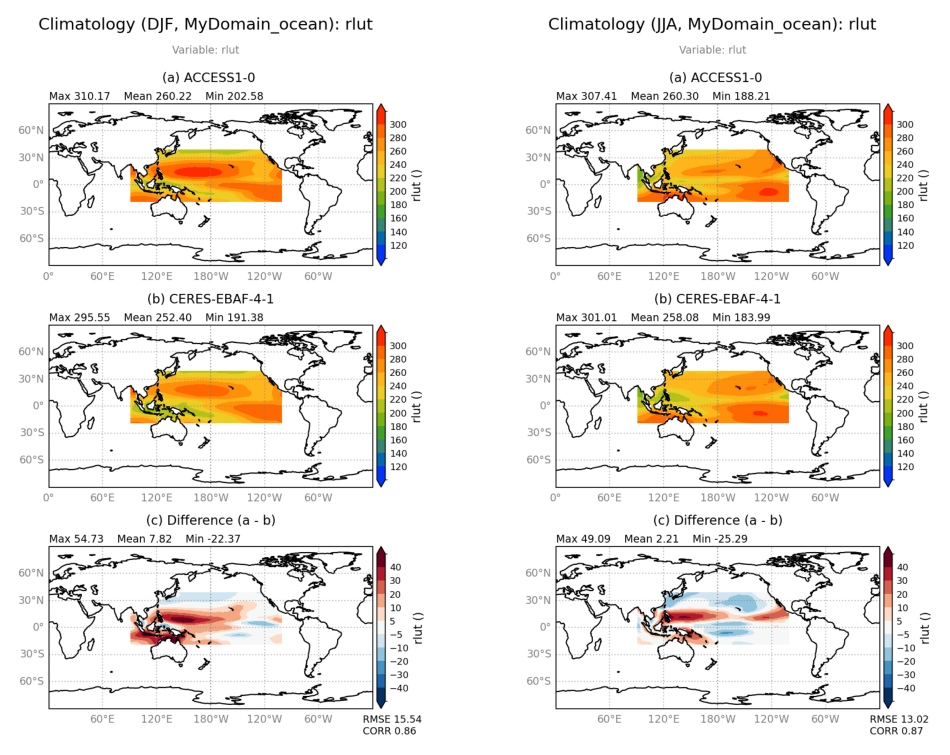

In [17]:
# path to images
image_path_djf = os.path.join(demo_output_directory,"Ex4/rlut/rlut_ACCESS1-0__interpolated_regrid2_MyDomain_ocean_DJF_Ex4.png")
image_path_jja = os.path.join(demo_output_directory,"Ex4/rlut/rlut_ACCESS1-0__interpolated_regrid2_MyDomain_ocean_JJA_Ex4.png")

# display images
fig, ax = plt.subplots(1,2); ax[0].axis('off'); ax[1].axis('off')
ax[0].imshow(mpimg.imread(image_path_djf))
ax[1].imshow(mpimg.imread(image_path_jja))

The region value `None` is another way of indicating "global"

Custom domain is controlled by the variable `regions_specs` in the parameter file or command line. For example, a custom region for Antarctica over land could be defined with `regions_specs = {'ANT': {'value': 100, 'domain': {'latitude': (-90, -60)}}}` in the parameter file. `value` indicate masking, 100: land only, 0: ocean only.

The command to use the custom region would look like `--regions '{"rlut": ["ANT"]}'` in the command line or `regions = {"rlut": ["ANT"]}` in the parameter file.

### Land/sea masks  
Land/Sea masking is required for some regions (e.g. "land"). This is controlled by variables `sftlf_filename_template` and `generate_sftlf`. The metrics package expects the land/sea mask files to be located with the model data under a fixed field variable ('fx') with a file name that follows the pattern in `sftlf_filename_template`. The example data does not come with a land/sea mask, so we set `generate_sftlf` to `True` in the basic parameter file to have the PMP generate a land/sea mask where 0 represents ocean and 100 represents land.

### Extract vertical level  and customize observations
This example shows how to extract a vertical level from a 4-D variable. The 500 hPa level of zg is specified by adding "\_500" to zg.  

There are several sets of observations available in the standard PCMDI set. This case uses the 'alternate1' observations for zg with the flag `reference_data_set`. The test and observations path are specified with `test_data_path` and `reference_data_path`, respectively.

To see which datasets are the default and which are alternates, check out [pcmdi_metrics/doc/obs_info_dictionary.json](https://github.com/PCMDI/pcmdi_metrics/blob/main/doc/obs_info_dictionary.json).

In [19]:
%%bash
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex5' \
--vars 'zg_500' \
--test_data_set 'CanCM4' \
--custom_observations 'obs_info_dictionary.json' \
--reference_data_path 'demo_data_tmp/obs4MIPs_PCMDI_clims' \
--reference_data_set "alternate1"

--- prepare mean climate metrics calculation ---
case_id: Ex5
test_data_set: ['CanCM4']
realization: 
vars: ['zg_500']
varname_in_test_data: None
reference_data_set: ['alternate1']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'value':

2025-07-15 15:59:18,365 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 15:59:18,365 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


'units'
units: 
load and regrid done
region: global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 43.13640873276298
metrics, stdObs_xyt
metrics, stdObs_xyt: 266.78849609579805
metrics, std_xyt
metrics, std_xyt: 289.17170261588956
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -26.728291784672724
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 27.307329969541808
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  36.86695104140803 25.392331467649086
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9982653836969346
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RM

INFO::2025-07-15 15:59::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 15:59:34,273 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 15:59:34,273 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json


region: NHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 52.20648601968069
metrics, stdObs_xyt
metrics, stdObs_xyt: 217.7710158733916
metrics, std_xyt
metrics, std_xyt: 243.07924110299624
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -33.984705234015856
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 36.125121242999796
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  43.40084946216971 26.993953845165787
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9934603831182984
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULATE 

INFO::2025-07-15 15:59::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 15:59:49,568 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 15:59:49,568 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json


region: SHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 61.71844279893344
metrics, stdObs_xyt
metrics, stdObs_xyt: 283.2198951123734
metrics, std_xyt
metrics, std_xyt: 296.61742032281194
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -53.00982014686102
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 53.00982014686102
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  56.89535103522665 20.66494465076205
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9981091418715418
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULATE ANN

INFO::2025-07-15 16:00::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 16:00:04,511 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 16:00:04,511 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json


region: TROPICS
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 14.846540218574845
metrics, stdObs_xyt
metrics, stdObs_xyt: 28.365941345001204
metrics, std_xyt
metrics, std_xyt: 34.43200606874954
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -9.9593208789076
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 10.047189244153815
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  12.569280267754309 7.6680332602513115
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9610677215773143
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULAT

INFO::2025-07-15 16:00::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 16:00:19,080 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2025-07-15 16:00:19,080 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
INFO::2025-07-15 16:00::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500_2.5x2.5_regrid2

pmp mean clim driver completed


There are a couple of steps for using an observational dataset that isn't included in **obs_info_dict.json**. The observational dataset mush be documented in a catalog json following the format used in **obs_info_dict.json**. Then set the variable `custom_observations` to the path for this catalog. The observation files need to be located under the path specified by `reference_data_path`

### Adding notes and other options  
This example adds a field to "user_notes" in the output json and saves the interpolated fields. Interpolated fields are saved at the same directory level as the parameter file.

In [20]:
%%bash 
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex6' --user_notes 'Example note' --save_test_clims True

--- prepare mean climate metrics calculation ---
case_id: Ex6
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['pr']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: True
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'value'

2025-07-15 16:01:15,256 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."
2025-07-15 16:01:15,256 [WARNING]: dataset.py(open_dataset:120) >> "No time coordinates were found in this dataset to decode. If time coordinates were expected to exist, make sure they are detectable by setting the CF 'axis' or 'standard_name' attribute (e.g., ds['time'].attrs['axis'] = 'T' or ds['time'].attrs['standard_name'] = 'time'). Afterwards, try decoding again with `xcdat.decode_time`."


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 16:01:15,481 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 16:01:15,481 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.7995509408249972
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.515774881304398
metrics, std_xyt
metrics, std_xyt: 3.1305194374804888
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 0.25922717938795004
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.72142914491151
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.1919949785767163 1.1634660710217004
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.883562458809904
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE 

INFO::2025-07-15 16:01::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex6.json
2025-07-15 16:01:41,121 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex6.json
2025-07-15 16:01:41,121 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/pr/pr_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex6.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.pr.198101-200512.AC.v20200426.nc


2025-07-15 16:01:41,129 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2025-07-15 16:01:41,129 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


Adjust units for pr
pr units adjusted to [mm d-1] from [kg m-2 s-1] by 86400 multiplied
units: mm/day
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var: pr
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 1.6937110851537234
metrics, stdObs_xyt
metrics, stdObs_xyt: 2.515774881304398
metrics, std_xyt
metrics, std_xyt: 2.7462907772599525
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -0.053533741934399505
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 0.7740939928776985
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  1.21206440023263 1.2108815998212985
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8345736267748058
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULA

INFO::2025-07-15 16:02::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_Ex6.json
2025-07-15 16:02:05,863 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_Ex6.json
2025-07-15 16:02:05,863 [INFO]: base.py(write:429) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/pr/pr_CanCM4__2.5x2.5_regrid2_metrics_default_Ex6.json
INFO::2025-07-15 16:02::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/pr_2.5x2.5_regrid2_metrics_Ex6.json
2025-07-15 16:02:09

pmp mean clim driver completed


#### Some other flags to note:  

* `--ext` '.nc' or '.xml'. NetCDF files should be post-processed annual climatologies  

* `--filename_template` Based on the format of your model files.  
    - When the file name varies based on model, experiment, or another parameter, use `%(parameter)` as a placeholder   
      (for example, `CMIP5.historical.%(model_version)...` in this demo's parameter file)  

* `--help` or `-h` Help command for more information about all flags.

* `--custom_observations` Path for observation catalogue JSON file.